<a href="https://colab.research.google.com/github/Divyesh-2598/Image-Classification/blob/master/CI_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
!unzip -q "/content/IMGFil.zip"

In [0]:
!ls

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
from PIL import Image

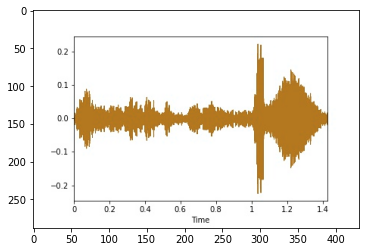

(288, 432, 3)


In [30]:
import cv2
DATADIR = "Imagggeeessssss"
CATEGORIES = ["Asthama_Images", "NormalCough_Images", "COPD_Images"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        plt.imshow(img_array)  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more

print(img_array.shape)

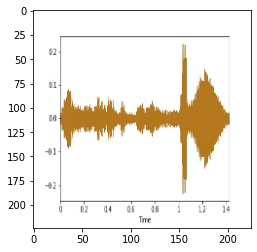

In [31]:
IMG_SIZE = 224

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [32]:
from tqdm import tqdm
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 49/49 [00:00<00:00, 451.17it/s]

286


In [33]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

1
0
0
0
2
0
0
1
0
2


In [34]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)


[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]]


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
from keras import layers
from keras import models
from keras.applications import VGG16
vgg16_model = keras.applications.vgg16.VGG16()
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [37]:
type(vgg16_model)

tensorflow.python.keras.engine.training.Model

In [0]:
from tensorflow.keras.models import Sequential
model = Sequential()
for layer in vgg16_model.layers[:-1]:
  model.add(layer)

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [0]:
for layer in model.layers:
  layers.trainable = False

In [0]:
import tensorflow as tf
#from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
model.add(Dense(3, activation='softmax'))

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [24]:
batch_size = 32
train_img_generator = ImageDataGenerator(width_shift_range=[-200,200], height_shift_range=0.5, rescale=1./255)
train_image_gen = train_img_generator.flow_from_directory(
    batch_size=batch_size, directory= DATADIR, shuffle=True, target_size=(IMG_SIZE, IMG_SIZE), class_mode=None)



Found 286 images belonging to 3 classes.


In [0]:
from keras import optimizers
sgd = optimizers.SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [44]:
model.fit(X, y, batch_size=None, epochs=10, verbose=1, validation_split=0.2)

Train on 228 samples, validate on 58 samples
Epoch 1/10
228/228 [==============================] - 454s 2s/sample - loss: nan - acc: 0.3640 - val_loss: nan - val_acc: 0.4655
Epoch 2/10
228/228 [==============================] - 448s 2s/sample - loss: nan - acc: 0.4167 - val_loss: nan - val_acc: 0.4655
Epoch 3/10
228/228 [==============================] - 449s 2s/sample - loss: nan - acc: 0.4167 - val_loss: nan - val_acc: 0.4655
Epoch 4/10
228/228 [==============================] - 449s 2s/sample - loss: nan - acc: 0.4167 - val_loss: nan - val_acc: 0.4655
Epoch 5/10
228/228 [==============================] - 449s 2s/sample - loss: nan - acc: 0.4167 - val_loss: nan - val_acc: 0.4655
Epoch 6/10
228/228 [==============================] - 449s 2s/sample - loss: nan - acc: 0.4167 - val_loss: nan - val_acc: 0.4655
Epoch 7/10
228/228 [==============================] - 445s 2s/sample - loss: nan - acc: 0.4167 - val_loss: nan - val_acc: 0.4655
Epoch 8/10
228/228 [==============================] 

In [0]:
predictions = model.predict

In [26]:
epochs = 10
history = model.fit_generator(
    train_image_gen,
    steps_per_epoch=32,
    epochs=epochs)

Epoch 1/10


InvalidArgumentError: ignored

In [46]:
def prepare(filepath):
    IMG_SIZE = 224
    img_array = cv2.imread(filepath)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

predictions = model.predict([prepare('/content/N.jpg109.jpg')])
print(CATEGORIES[int(predictions[0][0])])
#print(CATEGORIES[(predictions[0][0])])

ValueError: ignored

In [0]:
!unzip -q "/content/COPD.zip"

In [3]:
!ls

 Asthama   Asthama.zip	 COPD.zip   drive  'Normal Cough.zip'   sample_data


In [10]:
import librosa
from librosa import display
import os
import numpy as np
import pylab
import glob
data_dir = "COPD"
audio_files = glob.glob(data_dir + '/*.WAV')
len(audio_files)

49

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

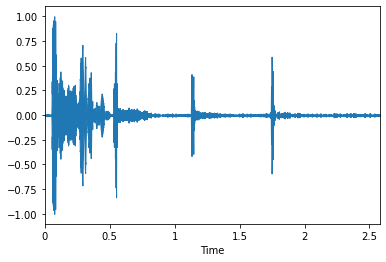

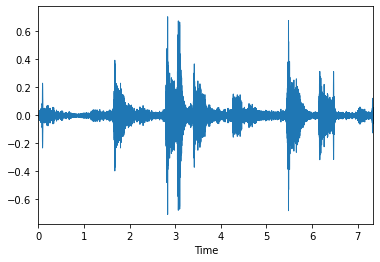

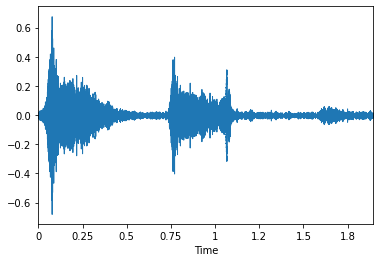

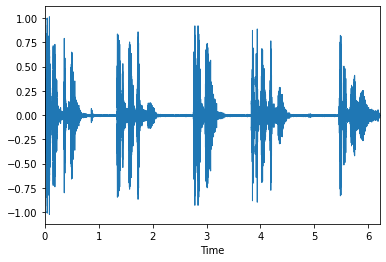

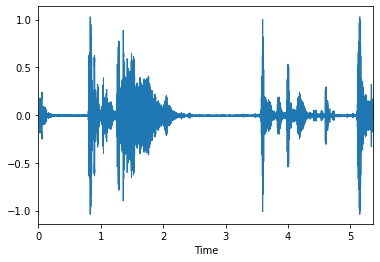

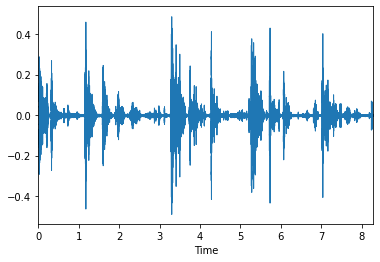

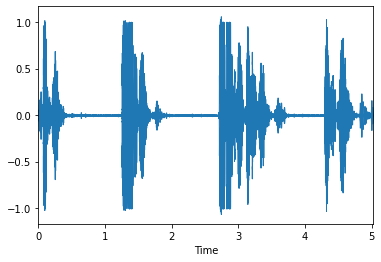

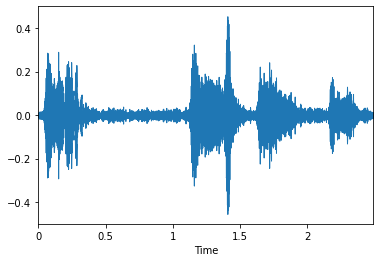

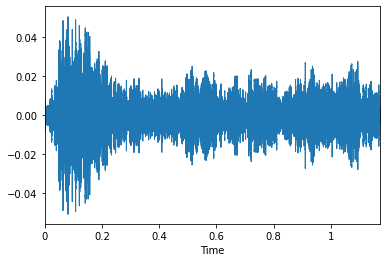

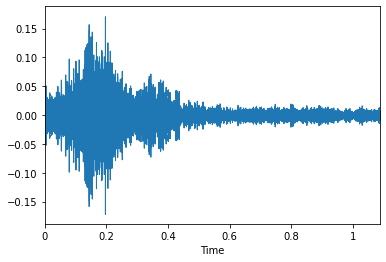

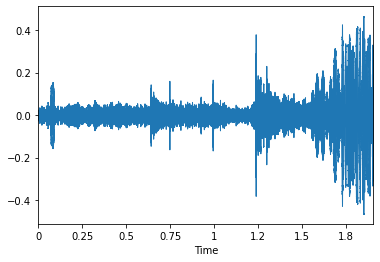

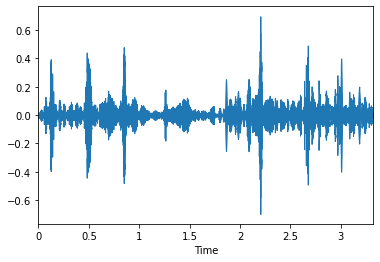

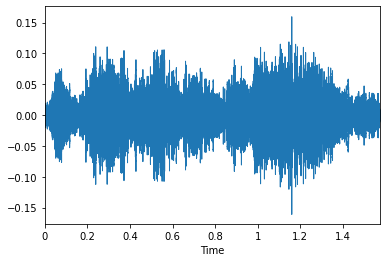

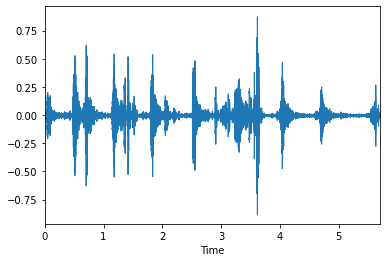

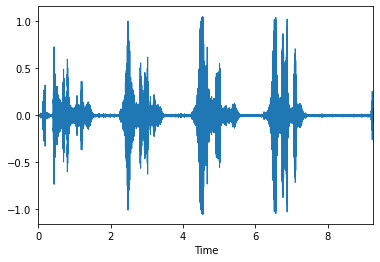

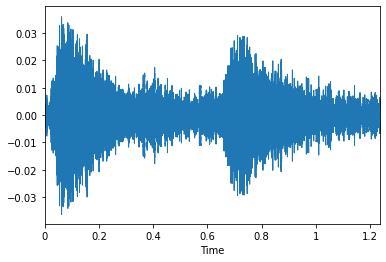

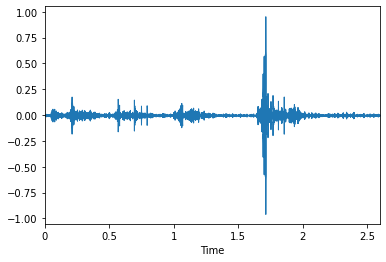

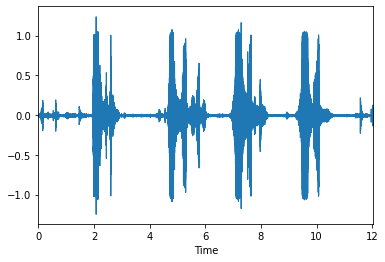

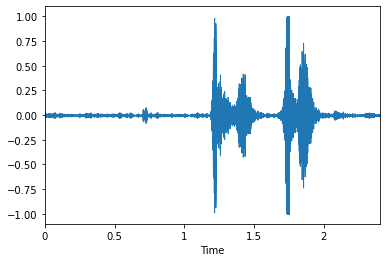

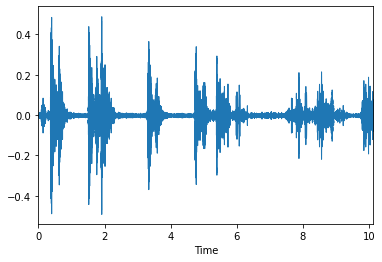

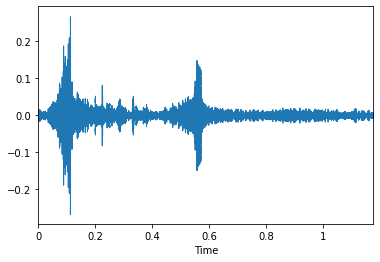

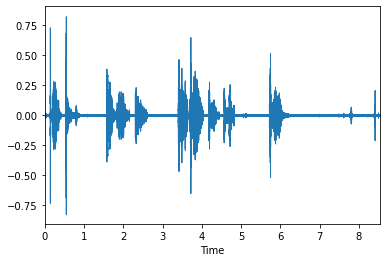

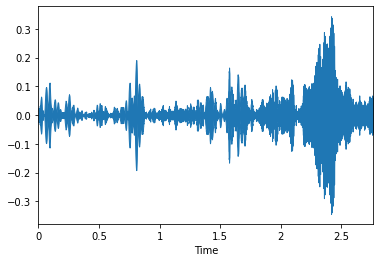

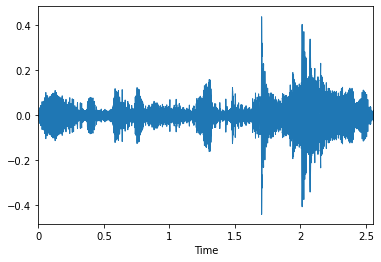

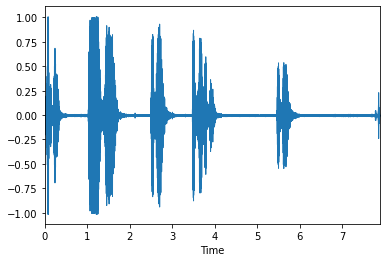

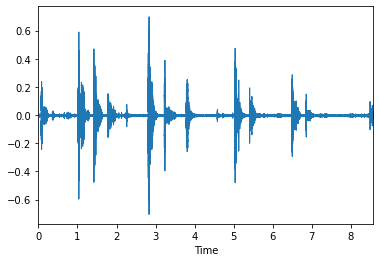

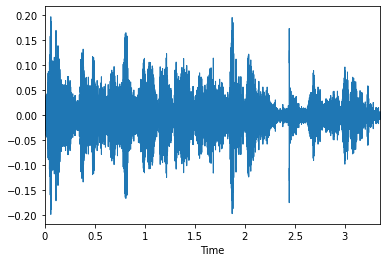

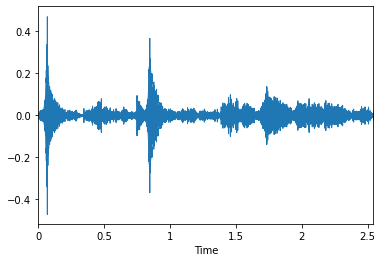

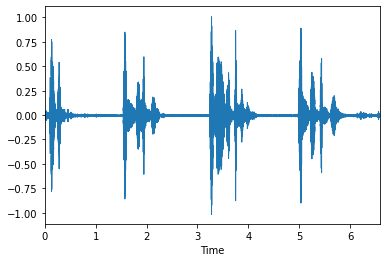

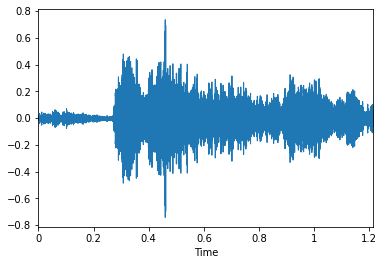

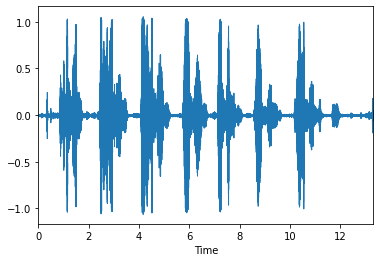

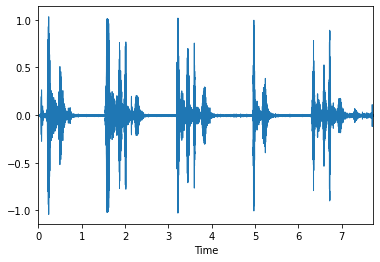

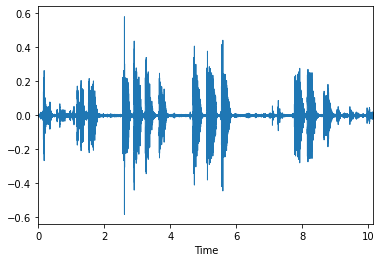

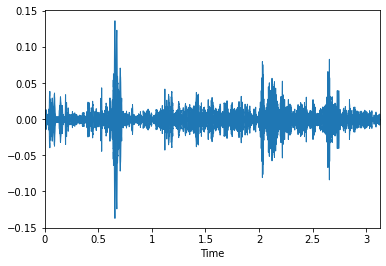

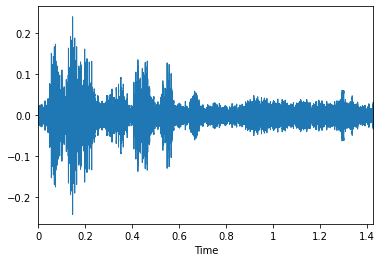

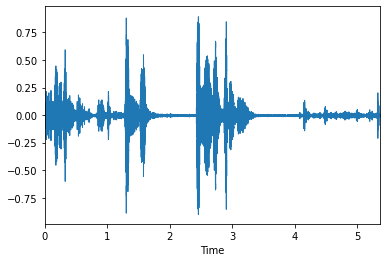

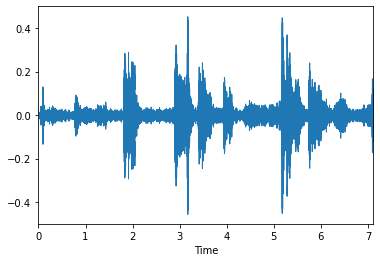

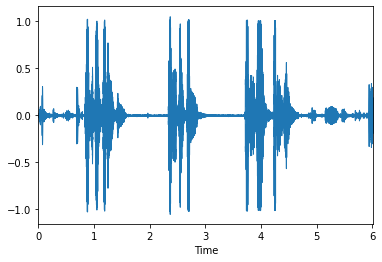

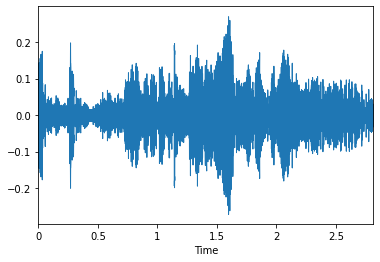

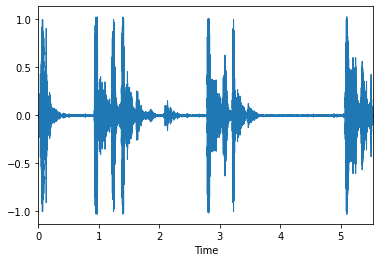

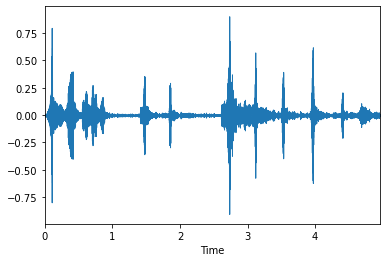

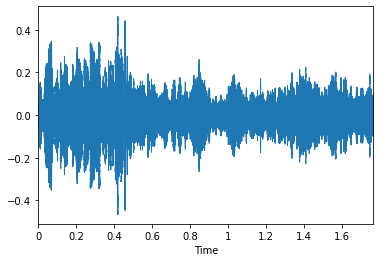

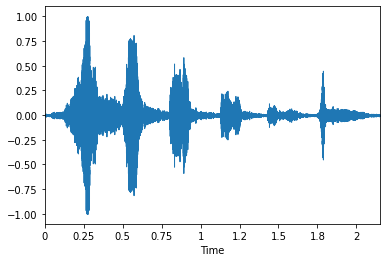

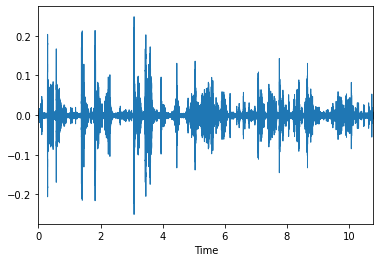

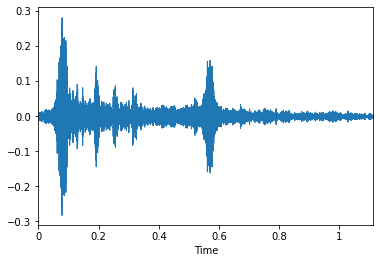

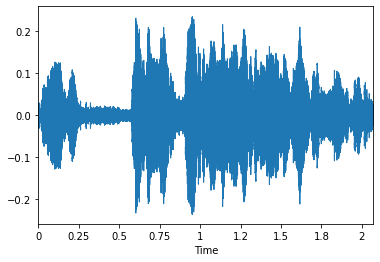

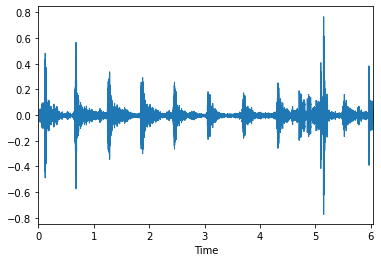

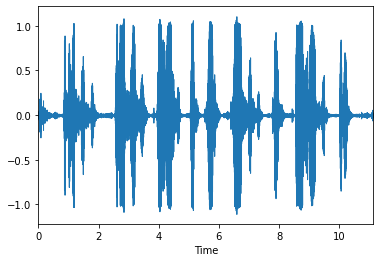

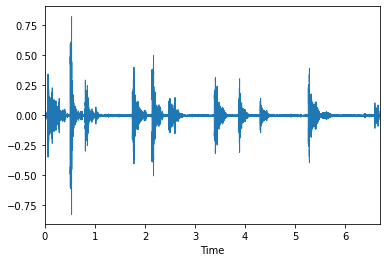

In [11]:
import matplotlib.pyplot as plt
image_no = 1
name = "C.jpg"
for file in range(len(audio_files)):
  y, sr = librosa.load(audio_files[file])
  plt.figure()
  #plt.subplot(3, 1, 1)
  librosa.display.waveplot(y, sr=sr)
  save_path = name + str(image_no) + '.jpg'
  pylab.savefig(save_path, bbox_inches=None, pad_inches=0)
  image_no += 1

In [28]:
import cv2
import librosa
from librosa import display
import os
import numpy as np
import pylab
import glob
data_dir = "/content/NC_Images"
files = glob.glob(data_dir + '/*.jpg')
len(files)

114

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


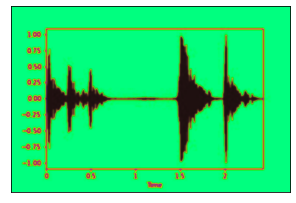

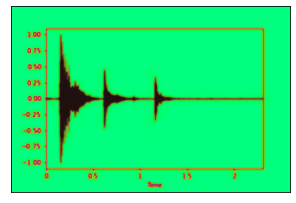

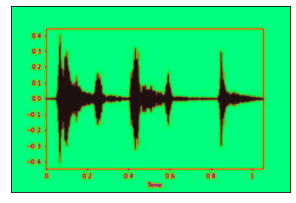

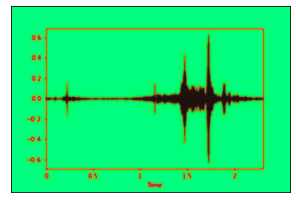

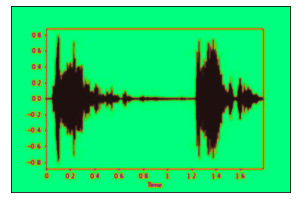

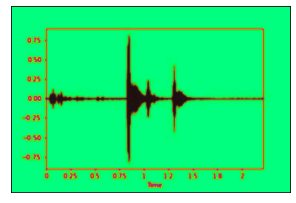

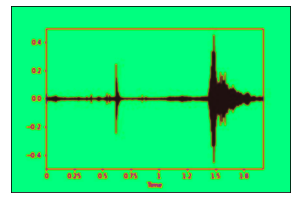

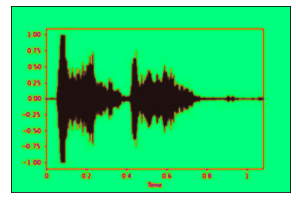

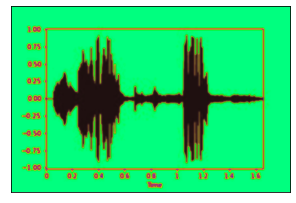

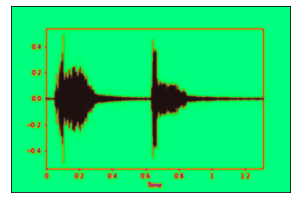

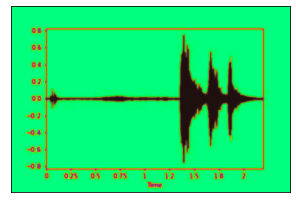

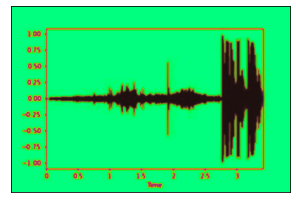

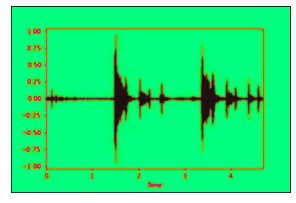

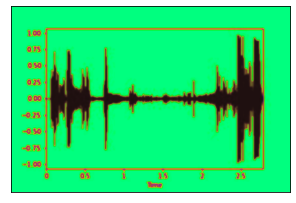

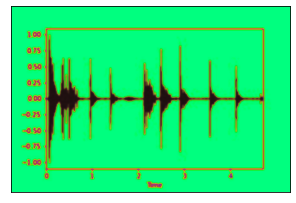

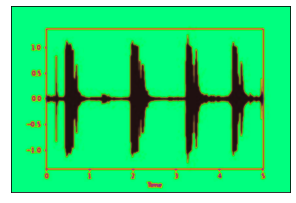

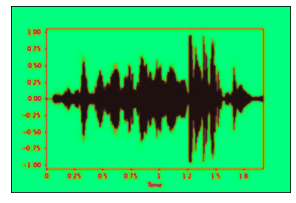

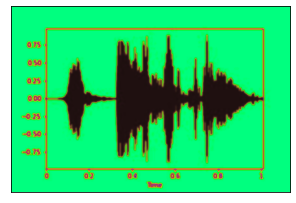

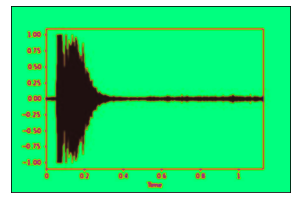

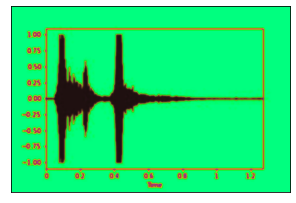

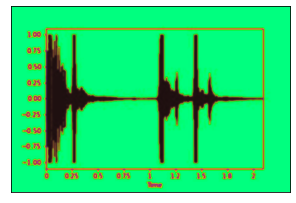

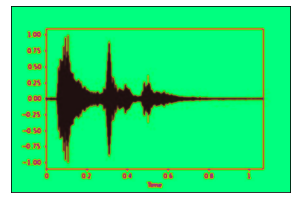

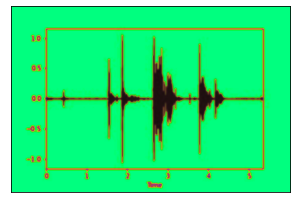

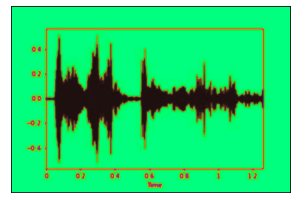

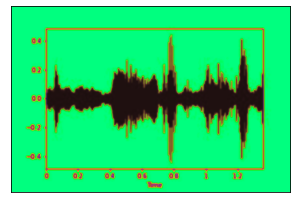

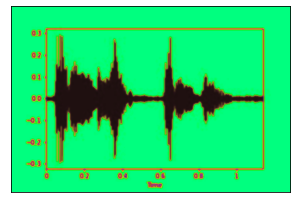

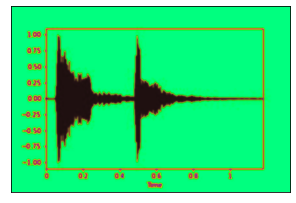

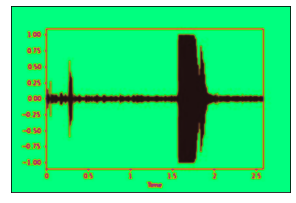

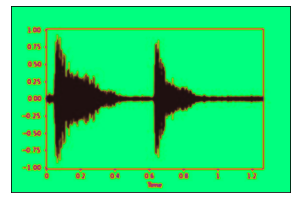

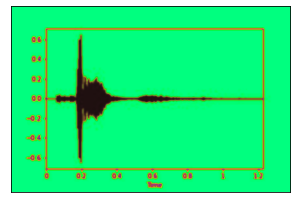

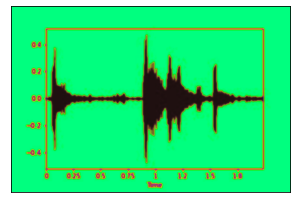

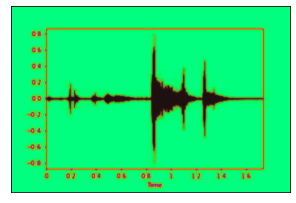

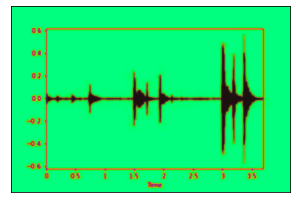

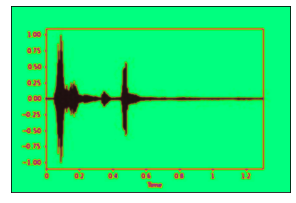

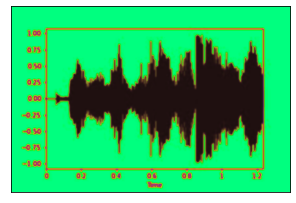

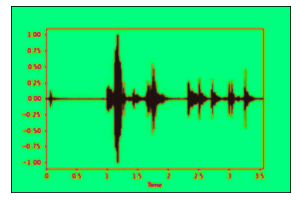

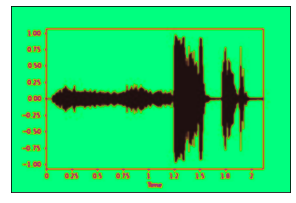

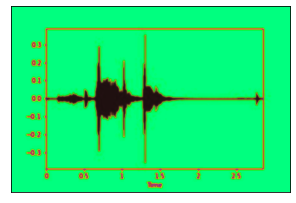

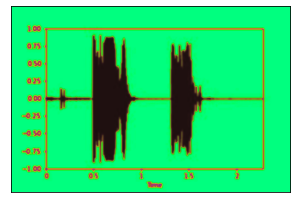

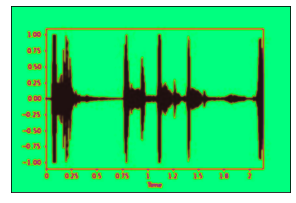

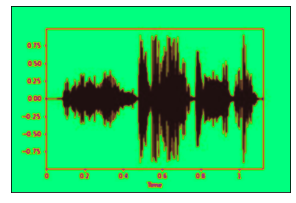

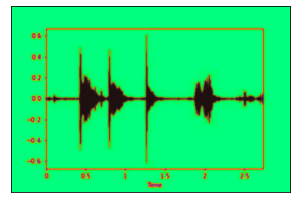

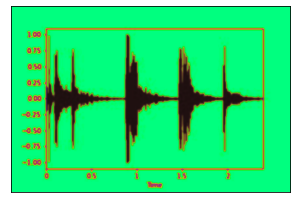

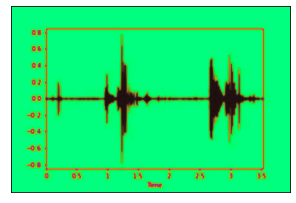

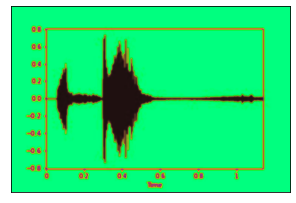

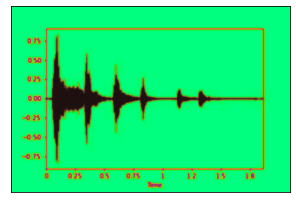

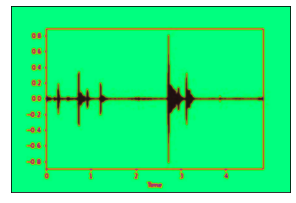

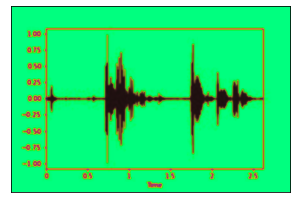

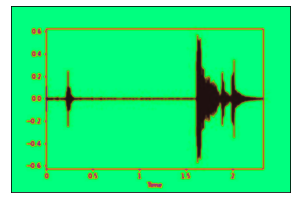

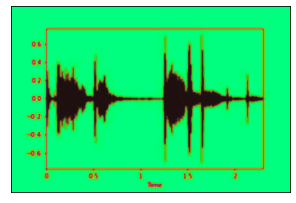

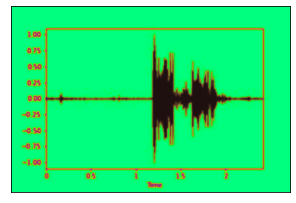

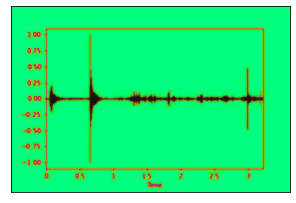

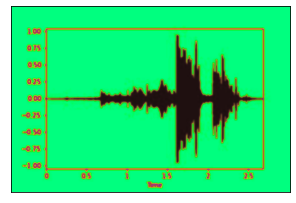

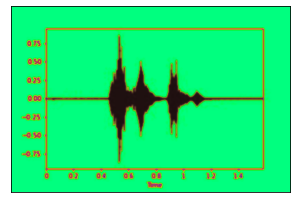

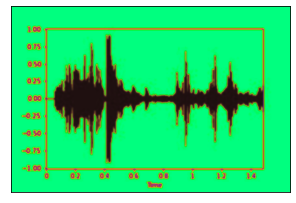

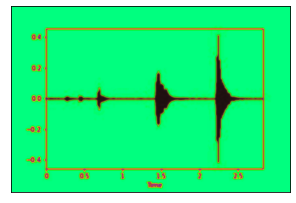

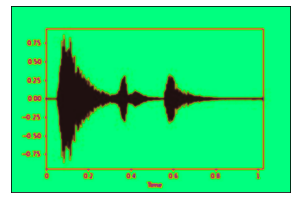

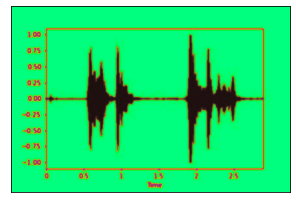

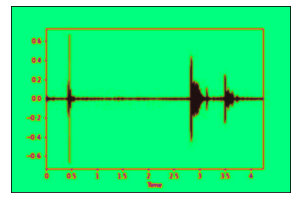

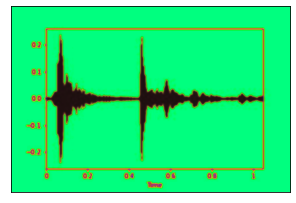

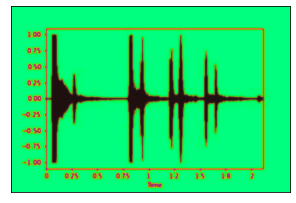

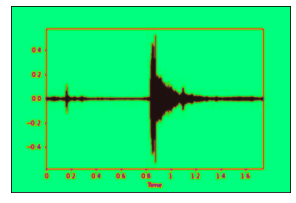

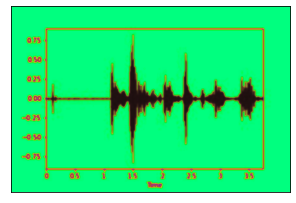

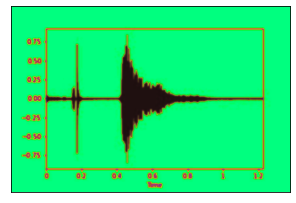

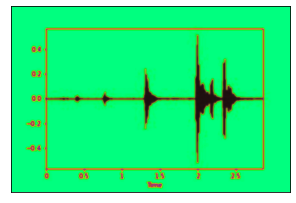

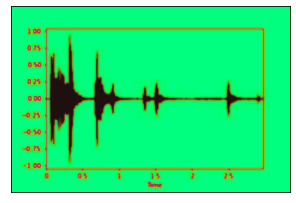

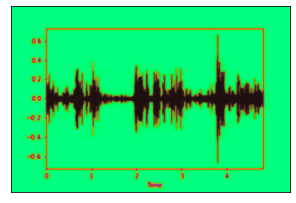

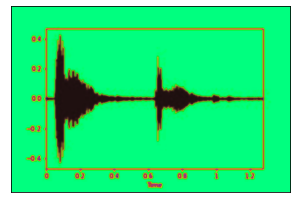

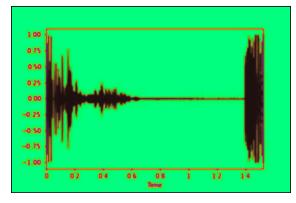

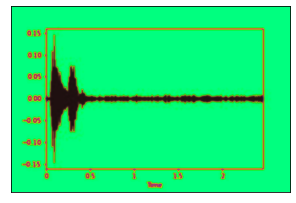

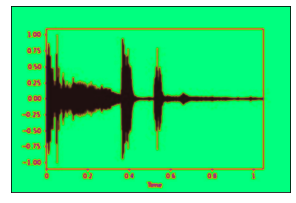

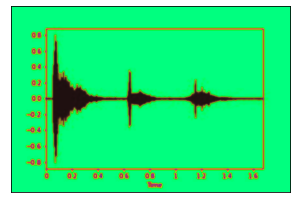

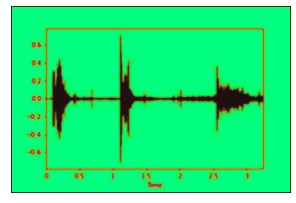

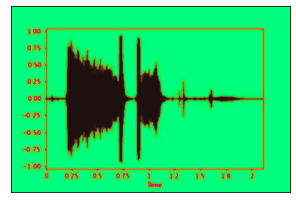

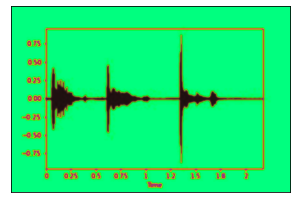

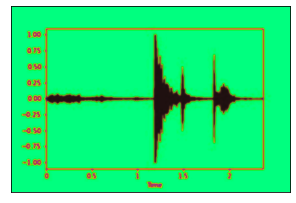

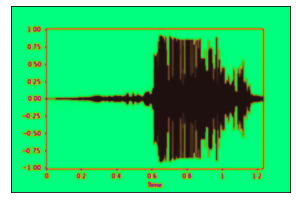

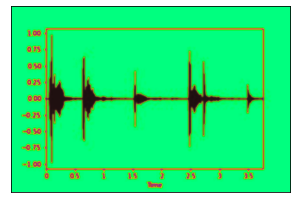

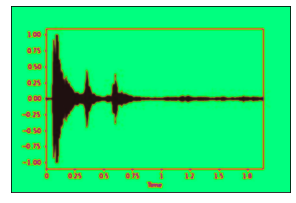

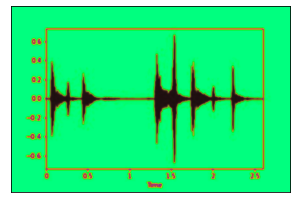

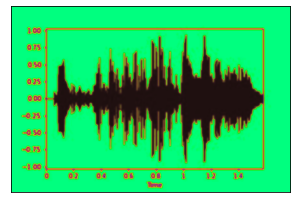

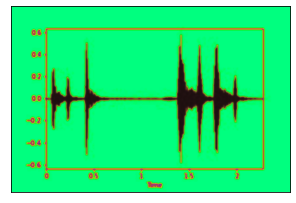

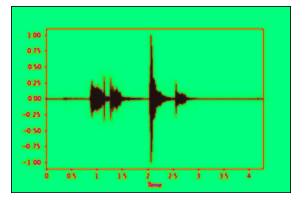

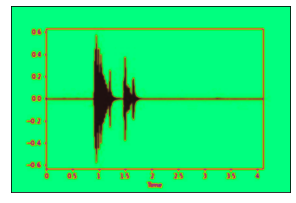

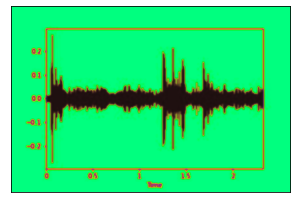

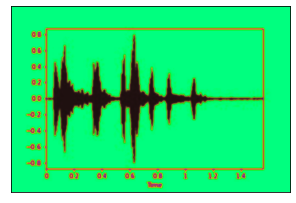

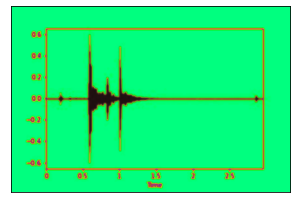

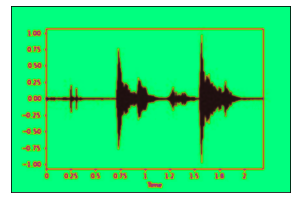

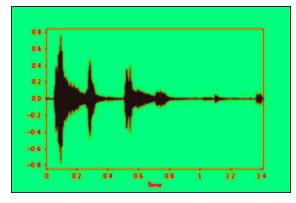

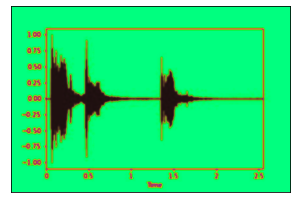

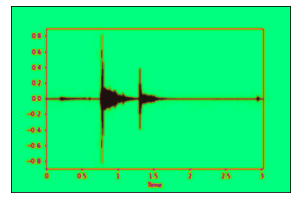

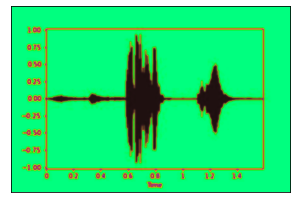

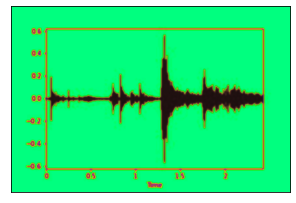

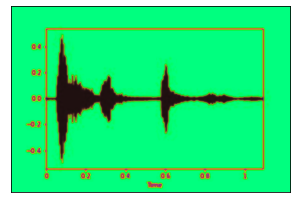

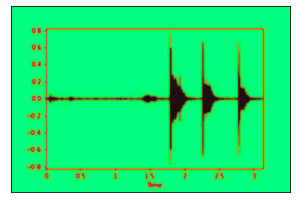

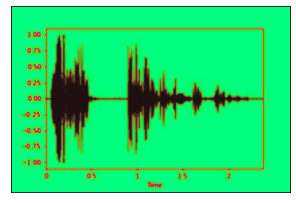

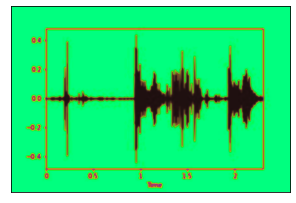

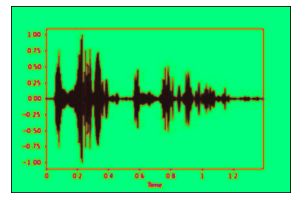

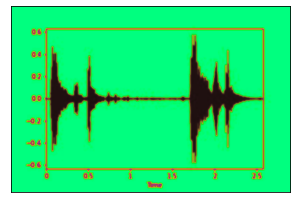

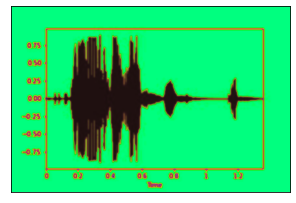

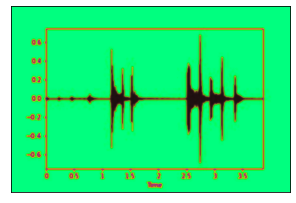

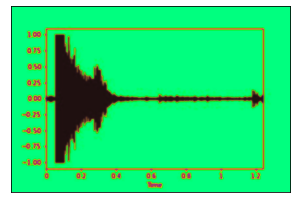

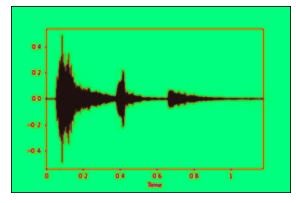

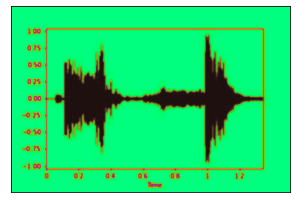

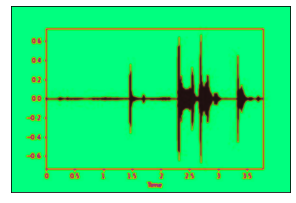

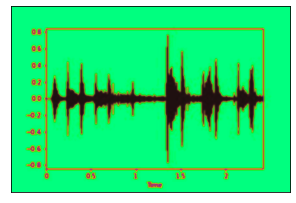

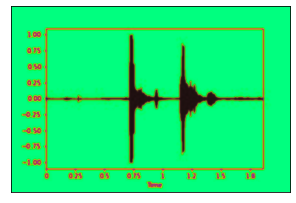

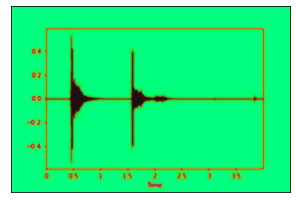

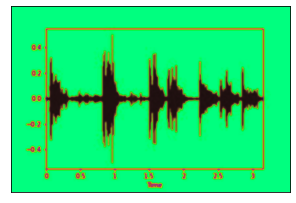

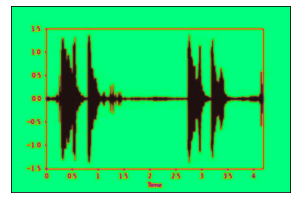

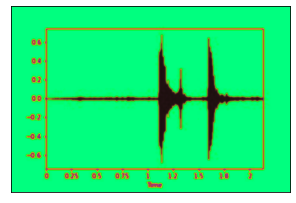

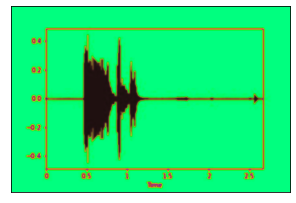

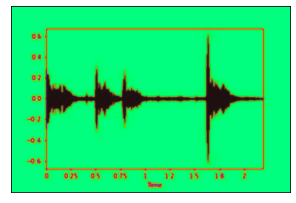

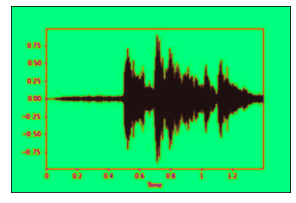

In [29]:
figure_size=5
image_no = 1
name = "NN.jpg"
for file in range(len(files)):
  image = cv2.imread(files[file])
  new_image = cv2.GaussianBlur(image, (figure_size, figure_size),0)
  plt.figure(figsize=(11,6))
  plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB))
  plt.xticks([]), plt.yticks([])
  save_path = name + str(image_no) + '.jpg'
  pylab.savefig(save_path, bbox_inches=None, pad_inches=0)
  image_no += 1

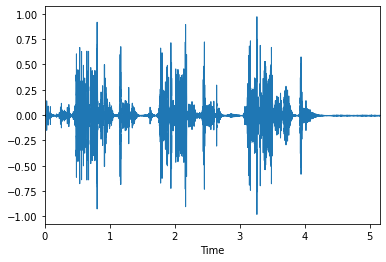

In [85]:
save_path="d.jpg"
y, sr = librosa.load('/content/Rec_2018_12_22_12_15_01.WAV')
plt.figure()
#plt.subplot(3, 1, 1)
librosa.display.waveplot(y, sr=sr)
pylab.savefig(save_path, bbox_inches=None, pad_inches=0)